<a href="https://colab.research.google.com/github/hdpark1208/StudyCode/blob/main/Algorithm/BJ/%EB%B9%97%EB%AC%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 빗물

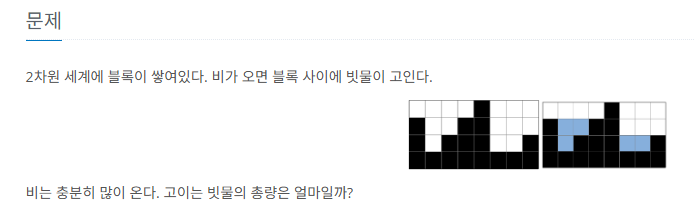

## 입력 출력 및 예제


* 입력

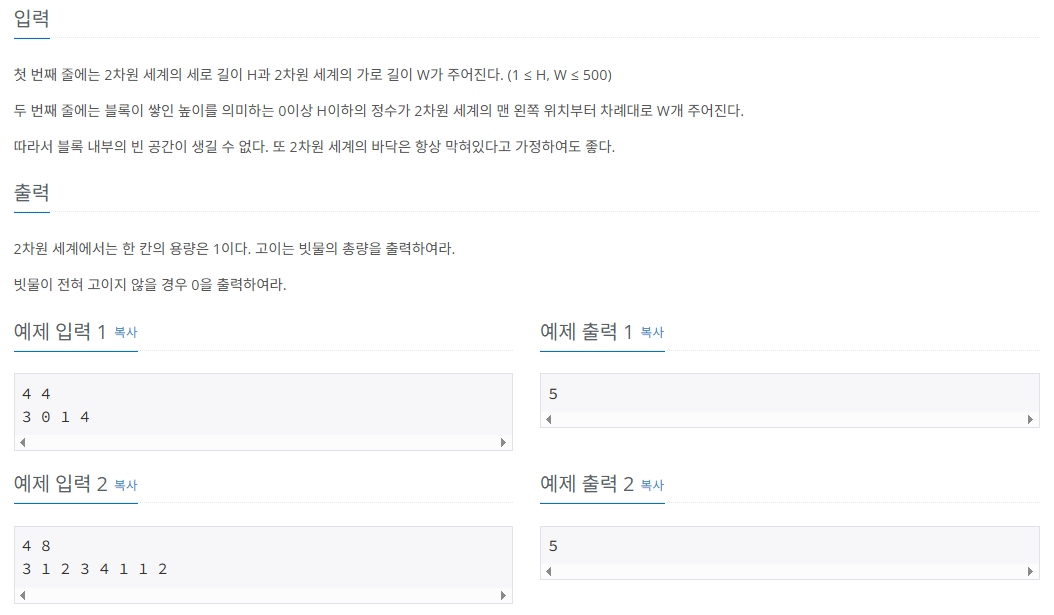

* 출력

* 예제

## 구상

- 빗물이 고이려면, 1. 높이 차이 2. 사이 공간이 필요하다
- 높이 차이를 만들어내는 좌우 높은 블럭을 저장하면서, 그 사이에 낮은 블럭들과의 높이차를 계산하면서, 갱신해나가보자
- 물은 두 기둥 사이에 고이는 것!
    - 두 기둥 사이를 잘 골랐을 때 고인 물의 양 계산하는 함수 (쉽다)
- 두 기둥 사이를 정하는 함수
    - 좌 기둥, 우 기둥 사이에는 적어도 하나의 공간이 있어야한다
    - 좌 기둥 조건
        - 자신의 오른쪽 블럭보다 커야한다
    - 우 기둥 조건
        - 좌 기둥 사이 공간이 있어야함
        - 자신의 왼쪽, 오른쪽 블럭보다 커야한다
    - 우 기둥은 계산 후에 좌 기둥이 된다


## 코드

In [14]:
# 생각대로 동작하나, 생각 자체를 잘못했음

def rainfall(x,y,graph): # x,y : 기둥의 양 끝 위치
    result = 0
    h = min(graph[x],graph[y])
    for i in range(x + 1, y):
        result += (h - graph[i])

    return result


H, W = map(int, input().split())
graph = list(map(int, input().split()))

# 더미
graph.append(0)

answer = 0

lb, rb = -1, -1

# lb, rb의 <위치>를 저장
for i in range(W):
    # lb가 정해지지 않았을 때
    if lb == -1 and rb == -1:
        # 오른쪽 기둥보다 크면
        if graph[i] > graph[i+1]:
            lb = i

        else:
            continue

    # lb만 정해져 있을 때
    elif lb != -1 and rb == -1:

        # 오른쪽 블럭보다 크고, 사이에 공간 있을 때

        if graph[i] > graph[i+1] and i > (lb + 1):
            rb = i

            # rb가 정해지는 순간 계산한 후 초기화

            answer += rainfall(lb, rb, graph)

            lb, rb = i, -1

print(answer)


7 8
7 1 1 5 0 5 2 7
16


In [1]:
H, W = map(int, input().split())
blocks = list(map(int, input().split()))

result = 0
for i in range(1, W-1):  # 양 끝은 물이 안 찰 수 있음
    left = max(blocks[:i])         # 왼쪽 최대
    right = max(blocks[i+1:])      # 오른쪽 최대
    water = min(left, right) - blocks[i]
    if water > 0:
        result += water
print(result)


4 4
3 0 1 4
5


### 메모
- 너무 복잡하게 생각했다...


* 각 칸을 기준으로 빗물이 차는 양을 더했네